# Základní datové typy

In [2]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [4]:
pd

<module 'pandas' from 'c:\\Users\\Student\\Documents\\pydata\\.venv\\Lib\\site-packages\\pandas\\__init__.py'>

Pandas má dva základní datové typy: Posloupnost (`Series`) a Tabulky (`DataFrame`).

## Posloupnost (Series)

Obsahuje sérii hodnoty jako seznam, ale navíc má:
- `name`: pomocí jména se serie vyhledá v tabulce, 
- `dtype`: všechny položky v sérii musí mít stejný datový typ 
- `index`, který jednotlivé hodnoty pojmenovává.

In [5]:
pd.Series?

Init signature:
pd.Series(
    data=None,
    index=None,
    dtype: 'Dtype | None' = None,
    name=None,
    copy: 'bool | None' = None,
    fastpath: 'bool | lib.NoDefault' = <no_default>,
) -> 'None'
Docstring:     
One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, \*, \*\*) align values based on their
associated index values-- they need not be the same length. The result
index will be the sorted union of the two indexes.

Parameters
----------
data : array-like, Iterable, dict, or scalar value
    Contains data stored in Series. If data is a dict, argument order is
    maintained.
index : array-like or Index (1d)
    

### Vytvoření posloupnosti
Posloupnost můžeme vytvořit jednoduše z pole.

Jediná povinná položka je `values`

In [6]:
data = ['Honza', 'Jirka', 'Petr', 'Daniela', None, 'Julie']
s = pd.Series(data)
s[1]

'Jirka'

In [7]:
pd.Series([1,2,3,4,5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

Nebo můžeme specifikovat i ostatní 1,2,3 parametry serie

In [8]:

index = ['H', 'J', 'P', 'D', 'N', 'J']
dtype = 'string'
name = 'Names'
s = pd.Series(data, index, dtype, name)
s['J']

J    Jirka
J    Julie
Name: Names, dtype: string

Mějme sérii `s` a podívejme se na výše zmíněné 4 hodnoty:

In [9]:
s = pd.Series(data, index, dtype, name)
print("values:", s.values, "\n")
print("index:", s.index, "\n")
print("dtype:", s.dtype, "\n")
print("name:", s.name, "\n")

values: <StringArray>
['Honza', 'Jirka', 'Petr', 'Daniela', <NA>, 'Julie']
Length: 6, dtype: string 

index: Index(['H', 'J', 'P', 'D', 'N', 'J'], dtype='object') 

dtype: string 

name: Names 



Kromě těchto základních informaci můžeme ještě zjistit:

In [10]:
print("size: ", s.size)


size:  6


Pandas vychází k knihovny numpy, proto má serie i atributy vázající se k této knihovně:

In [11]:
print("shape: ", s.size)
print("array: ", s.array)

shape:  6
array:  <StringArray>
['Honza', 'Jirka', 'Petr', 'Daniela', <NA>, 'Julie']
Length: 6, dtype: string


### Pomocí Numpy
Nebo z numpy pole

In [12]:
import numpy as np

normal = pd.Series(np.random.normal(0, 1, 10))
normal

0   -2.041904
1    0.558745
2   -0.069865
3   -0.417660
4    0.049630
5   -0.777023
6   -0.462104
7   -0.413327
8   -0.825344
9    1.118148
dtype: float64

### Z jiných struktur
A také z slovníku (dict)

In [13]:
sports = {
   "fotbal" : "Evropa",
   "kriket" : "Indie",
   "lední hokej" : "Asie",
   "tenis" : "Evropa",
   "volejbal" : "Asie",
   "stolní tenis" : "Asie",
   "baseball" : "USA",
   "golf" : "USA",
   "americký fotbal" : "USA",
   "basketball" : "USA"
}
pd.Series(sports)

fotbal             Evropa
kriket              Indie
lední hokej          Asie
tenis              Evropa
volejbal             Asie
stolní tenis         Asie
baseball              USA
golf                  USA
americký fotbal       USA
basketball            USA
dtype: object

> #### Příklad:
> Máte k dispozici slovník obsahující jednotlivé státy EU:

In [14]:
states_dict = {
'BE': 'Belgie',
'LT': 'Litva',
'AT': 'Rakousko',
'BG': 'Bulharsko',
'LV': 'Lotyšsko', 
'RO': 'Rumunsko',
'DK': 'Dánsko',
'LU': 'Lucembursko',  
'GR': 'Řecko',
'EE': 'Estonsko',
'HU': 'Maďarsko', 
'SK': 'Slovensko',
'FI': 'Finsko',
'MT': 'Malta',
'SI': 'Slovinsko',
'FR': 'Francie',
'DE': 'Německo',  
'GB': 'Spojené království',
'IE': 'Irsko',
'NL': 'Nizozemsko',   
'ES': 'Španělsko',
'IT': 'Itálie',
'PL': 'Polsko',   
'SE': 'Švédsko',
'CY': 'Kypr',
'PT': 'Portugalsko',  
'HR': 'Chorvatsko',
}

> Vytvořte z toho slovníku Serii

In [15]:
# Řešení
pd.Series(states_dict)

BE                Belgie
LT                 Litva
AT              Rakousko
BG             Bulharsko
LV              Lotyšsko
RO              Rumunsko
DK                Dánsko
LU           Lucembursko
GR                 Řecko
EE              Estonsko
HU              Maďarsko
SK             Slovensko
FI                Finsko
MT                 Malta
SI             Slovinsko
FR               Francie
DE               Německo
GB    Spojené království
IE                 Irsko
NL            Nizozemsko
ES             Španělsko
IT                Itálie
PL                Polsko
SE               Švédsko
CY                  Kypr
PT           Portugalsko
HR            Chorvatsko
dtype: object

> #### Příklad:
> Vypisovat ručně státy do slovníku abychom je pak použili do serie je nuda.
> Zkuste [api rest conbries](https://restcountries.eu/rest/v2/regionalbloc/eu):
> Použijte knihovny:
> - `requests`: pro stažení dat z API
> - `json`: pro zpracování odpovědi od `dict`
> Tip: pro tvorbu `dict` použijte Comprehensions.

In [16]:
%pip install requests
import requests

In [17]:
requests

<module 'requests' from 'c:\\Users\\Student\\Documents\\pydata\\.venv\\Lib\\site-packages\\requests\\__init__.py'>

In [18]:
# Řešení
response = requests.get("https://restcountries.com/v3.1/subregion/europe")
response.status_code

200

In [19]:
response.json()[0]

{'name': {'common': 'Norway',
  'official': 'Kingdom of Norway',
  'nativeName': {'nno': {'official': 'Kongeriket Noreg', 'common': 'Noreg'},
   'nob': {'official': 'Kongeriket Norge', 'common': 'Norge'},
   'smi': {'official': 'Norgga gonagasriika', 'common': 'Norgga'}}},
 'tld': ['.no'],
 'cca2': 'NO',
 'ccn3': '578',
 'cca3': 'NOR',
 'cioc': 'NOR',
 'independent': True,
 'status': 'officially-assigned',
 'unMember': True,
 'currencies': {'NOK': {'name': 'Norwegian krone', 'symbol': 'kr'}},
 'idd': {'root': '+4', 'suffixes': ['7']},
 'capital': ['Oslo'],
 'altSpellings': ['NO',
  'Norge',
  'Noreg',
  'Kingdom of Norway',
  'Kongeriket Norge',
  'Kongeriket Noreg'],
 'region': 'Europe',
 'subregion': 'Northern Europe',
 'languages': {'nno': 'Norwegian Nynorsk',
  'nob': 'Norwegian Bokmål',
  'smi': 'Sami'},
 'translations': {'ara': {'official': 'مملكة النرويج', 'common': 'النرويج'},
  'bre': {'official': 'Rouantelezh Norvegia', 'common': 'Norvegia'},
  'ces': {'official': 'Norské krá

In [20]:
for stat in response.json():
    print(stat['cca3'], stat['population'], stat['flag'])

NOR 5379475 🇳🇴
GRC 10715549 🇬🇷
ALA 29458 🇦🇽
CHE 8654622 🇨🇭
HRV 4047200 🇭🇷
ISL 366425 🇮🇸
LUX 632275 🇱🇺
HUN 9749763 🇭🇺
NLD 16655799 🇳🇱
LTU 2794700 🇱🇹
SVK 5458827 🇸🇰
LIE 38137 🇱🇮
MDA 2617820 🇲🇩
ITA 59554023 🇮🇹
JEY 100800 🇯🇪
MCO 39244 🇲🇨
BLR 9398861 🇧🇾
LVA 1901548 🇱🇻
AND 77265 🇦🇩
FRA 67391582 🇫🇷
GIB 33691 🇬🇮
DNK 5831404 🇩🇰
MKD 2077132 🇲🇰
MLT 525285 🇲🇹
CZE 10698896 🇨🇿
GGY 62999 🇬🇬
UNK 1775378 🇽🇰
SJM 2562 🇸🇯
MNE 621718 🇲🇪
FRO 48865 🇫🇴
ALB 2837743 🇦🇱
SRB 6908224 🇷🇸
UKR 44134693 🇺🇦
IMN 85032 🇮🇲
EST 1331057 🇪🇪
ROU 19286123 🇷🇴
BGR 6927288 🇧🇬
DEU 83240525 🇩🇪
POL 37950802 🇵🇱
GBR 67215293 🇬🇧
FIN 5530719 🇫🇮
SWE 10353442 🇸🇪
VAT 451 🇻🇦
RUS 144104080 🇷🇺
AUT 8917205 🇦🇹
CYP 1207361 🇨🇾
PRT 10305564 🇵🇹
BIH 3280815 🇧🇦
BEL 11555997 🇧🇪
ESP 47351567 🇪🇸
SVN 2100126 🇸🇮
SMR 33938 🇸🇲
IRL 4994724 🇮🇪


In [21]:
populace = pd.Series({
    stat['cca3']:stat['population'] 
    for stat in response.json()})
populace

NOR      5379475
GRC     10715549
ALA        29458
CHE      8654622
HRV      4047200
ISL       366425
LUX       632275
HUN      9749763
NLD     16655799
LTU      2794700
SVK      5458827
LIE        38137
MDA      2617820
ITA     59554023
JEY       100800
MCO        39244
BLR      9398861
LVA      1901548
AND        77265
FRA     67391582
GIB        33691
DNK      5831404
MKD      2077132
MLT       525285
CZE     10698896
GGY        62999
UNK      1775378
SJM         2562
MNE       621718
FRO        48865
ALB      2837743
SRB      6908224
UKR     44134693
IMN        85032
EST      1331057
ROU     19286123
BGR      6927288
DEU     83240525
POL     37950802
GBR     67215293
FIN      5530719
SWE     10353442
VAT          451
RUS    144104080
AUT      8917205
CYP      1207361
PRT     10305564
BIH      3280815
BEL     11555997
ESP     47351567
SVN      2100126
SMR        33938
IRL      4994724
dtype: int64

### Načtení Serie
Nebo můžeme načíst serii ze souboru (například csv, excel ...)
V takovém případě by měl soubor obsahovat jeden nebo dva sloupce.
A musíme použít přepínač `squeeze=True`, jinak nám data načte jako tabulku (`Dataframe`) a o něm si budeme povídat za chvíli.

In [22]:
pd.read_csv("static/sports_names.csv").squeeze()

0         fotbal
1         kriket
2    lední hokej
3          tenis
4       volejbal
5         stolní
6       baseball
7           golf
8       americký
9     basketball
Name: Název, dtype: object

Pokud mají data dva sloupce, můžeme jeden z nich nastavit jako index sloupce:

<Axes: xlabel='datum'>

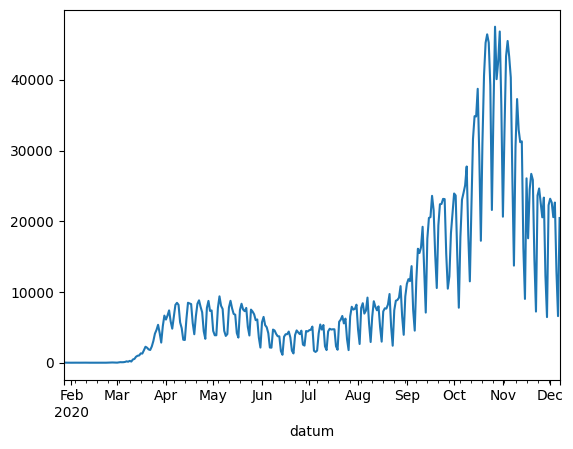

In [23]:
covid_testy = pd.read_csv("static/covid_testy.csv", 
                          index_col="datum", 
                          parse_dates=True,
                          #skiprows=filter,
                          ).squeeze()
covid_testy.plot()

In [24]:
covid_testy['2020-12']

datum
2020-12-01    23182
2020-12-02    22650
2020-12-03    20577
2020-12-04    22642
2020-12-05    12913
2020-12-06     6588
2020-12-07    20457
Name: prirustkovy_pocet_testu, dtype: int64

In [25]:
%pip install lxml


Note: you may need to restart the kernel to use updated packages.


In [26]:
kluby = pd.read_html("https://cs.wikipedia.org/wiki/Seznam_nejstar%C5%A1%C3%ADch_fotbalov%C3%BDch_klub%C5%AF_v_%C4%8Cesku")[0]
kluby.set_index("Rok založení")['Název']

Rok založení
1892                                 SK Slavia Praha[p 1]
1893    FK Loučeň 1893, AC Sparta Praha[p 2], ČSK Uher...
1894                                   SK Spartak Příbram
1896                                      FK Meteor Praha
1898    SK Český Brod, SK Jičín, SK Praha VII (FK Loko...
1899                ČAFC Královské Vinohrady, AFK Chrudim
1900              SK Polaban Nymburk, SK České Budějovice
1901    SK Brandýs nad Labem, SK Náchod, SK Kralupy na...
1902                  FK Mladá Boleslav, SK Stella Čáslav
1903    SK Viktoria Žižkov, SK Kladno, SK Rakovník, SK...
1904                           1. SK Prostějov, SK Semily
1905    AFK Vršovice (Bohemians), SK Hradec Králové, S...
1906    SK Moravská Slavia Brno, SK Sparta Kladno, FC ...
1907    AFK Union Žižkov, Novoměstský SK Kladno, FK Sl...
1908    SK Jaroměř, SK Sparta Košíře, SK Husovice, AFK...
1909    SK Kročehlavy, SK Most, AFK Přelouč, FK Admira...
1910    FC Písek, FK Jindřichův Hradec 1910, SK Smícho...
1

In [27]:
dfs = pd.read_html("https://cs.wikipedia.org/wiki/Nejlep%C5%A1%C3%AD_fotbalista_20._stolet%C3%AD")
len(dfs)

6

In [28]:
dfs[0].set_index("Stát")["Hlasy"]

Stát
Brazílie                               1705
Nizozemsko                             1303
Německo                                1228
Argentina, Španělsko, Kolumbie         1215
Argentina                              1214
Maďarsko, Španělsko                     810
Francie                                 722
Brazílie                                624
Portugalsko                             544
Anglie                                  508
Anglie                                  368
Nizozemsko                              315
Německo                                 310
Brazílie                                207
Německo                                 202
Severní Irsko                           187
Uruguay, Itálie                         158
Nizozemsko                              119
Brazílie                                116
Itálie                                  116
Itálie                                  108
Rakousko                                106
Německo                    

### Serie z DataFrame
A dalším způsobem, a možná nejčastějším je z tabulky.
Z tabulky můžeme získat Serii jako sloupec nebo i jako řádek.

Nejprve si načteme tabulku a poté si z ní vypíši jeden sloupec:

In [1]:
got = pd.read_csv("static/game_of_throne.csv")
got # Výpis tabulky pro kontrolu

NameError: name 'pd' is not defined

Vypsání konkrétní serie

In [ ]:
got['role']

### Statistické informace
Pokud Serie obsahuje čísla, dají se spočítat i základní statistické údaje a nebo funkce plot vykreslit do grafu()

In [ ]:
covid_testy = pd.read_csv("static/covid_testy.csv", 
                          index_col="datum", 
                          parse_dates=True).squeeze()
covid_testy['2020-11'].describe()

> #### Příklad:
> Ze soubory [`gold_by_year.csv`](static/gold_by_year.csv) načtěte cenu zlata.
> Vypište základní statistické údaje.

In [ ]:
# Řešení
gold = pd.read_csv('static/gold_by_year.csv', index_col='Date').squeeze()
gold.describe()

In [ ]:
gold.plot()

## Konverze serie
Pokud máme serii například řetěců, ale víme, že obsahují pouze čísla, pak je můžeme snadno přetypovat:

In [29]:
s = pd.Series(data=['1','10','100','123','0',])
s

0      1
1     10
2    100
3    123
4      0
dtype: object

> Takže výsledkem operace `s + s` bude:

In [32]:
s + s

0        11
1      1010
2    100100
3    123123
4        00
dtype: object

Pomocí metody `astype` můžeme *Serii* přetypovat:

In [36]:
print(s.dtype)
si = s.astype(int)
print(si.dtype)
si + si

object
int64


0      2
1     20
2    200
3    246
4      0
dtype: int64

Další užitečnou funckí je `copy`.
Pandas nám občas dokonče doporučuje kopie udělat při náročnějších operacích.

In [39]:
sc = s.copy()
sc[0] = -1
s, sc

(0     -1
 1     10
 2    100
 3    123
 4      0
 dtype: object,
 0     -1
 1     10
 2    100
 3    123
 4      0
 dtype: object)

## Tabulky (DataFrame)

Základní datový typ, který Pandas nabízí, je `DataFrame`, neboli lidově „tabulka”.
V příkladech se často pojmenována zkráceně jako `df`.
Jednotlivé záznamy jsou v ní uvedeny jako řádky a části těchto záznamů jsou úhledně srovnány ve sloupcích.

In [40]:
pd.DataFrame?

Init signature:
pd.DataFrame(
    data=None,
    index: 'Axes | None' = None,
    columns: 'Axes | None' = None,
    dtype: 'Dtype | None' = None,
    copy: 'bool | None' = None,
) -> 'None'
Docstring:     
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order. If a dict contains Series
    which have an index defined, it is aligned by its index. This alignment also
    occurs if data is a Series or a DataFrame itself. Alignment is done on
    Series/DataFrame inputs.

    If data is a list of dicts, column order follows 

Nejpoužívanější způsob, jak naplnit první DataFrame, je načtení ze souboru.
Na to má Pandas sadu funkcí začínající `read_`.
(Některé z nich potřebují další knihovny, viz dokumentace.)

### Vytvoření tabulky
Tabulky lze vytvořit z pythonních struktur, které jsou dvojrozměrné.
Například z pole polí:

In [41]:
pd.DataFrame([
   ["Book", 123],
   ["Computer", 2185],
])

0     1
0      Book   123
1  Computer  2185

Nebo kombinace pole a slovníku.
V takovém případě může slovník vystupovat jak v roli řádků:

In [83]:
data = [
   {"name": "Book", "price": 123, "vyprodano": True},
   {"name": "Computer", "price": 2185},
]

In [84]:
pd.DataFrame(data)     

name  price vyprodano
0      Book    123      True
1  Computer   2185       NaN

In [89]:
pd.DataFrame.from_dict(data)

name  price vyprodano
0      Book    123      True
1  Computer   2185       NaN

In [ ]:
pd.DataFrame(response.json())

In [ ]:
pd.read_json("https://restcountries.com/v3.1/subregion/europe")

In [77]:
hory = pd.read_html("https://cs.wikipedia.org/wiki/Nejvy%C5%A1%C5%A1%C3%AD_hory_%C4%8Ceska#:~:text=Nejvy%C5%A1%C5%A1%C3%AD%20horou%20%C4%8Ceska%20je%20Sn%C4%9B%C5%BEka%20(1%20603%20m)",
                    decimal=",",
                    thousands="\u00A0")[0]

hory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      13 non-null     int64  
 1   Vrchol          13 non-null     object 
 2   Pohoří          13 non-null     object 
 3   Výška  (m)      13 non-null     int64  
 4   Prominence (m)  13 non-null     int64  
 5   Izolace (km)    13 non-null     float64
 6   Souřadnice      13 non-null     object 
dtypes: float64(1), int64(3), object(3)
memory usage: 860.0+ bytes


In [76]:
"\N{Snowman Without Snow} \u26C4"

'⛄ ⛄'

In [78]:
hory

Unnamed: 0            Vrchol                      Pohoří  Výška  (m)  \
0            1            Sněžka                    Krkonoše        1603   
1            2            Praděd               Hrubý Jeseník        1491   
2            3  Králický Sněžník            Králický Sněžník        1423   
3            4            Plechý                      Šumava        1378   
4            5         Lysá hora     Moravskoslezské Beskydy        1324   
5            6              Smrk     Moravskoslezské Beskydy        1277   
6            7           Kněhyně     Moravskoslezské Beskydy        1257   
7            8          Klínovec                 Krušné hory        1244   
8            9      Velká Deštná                Orlické hory        1116   
9           10           Čerchov                   Český les        1042   
10          11            Ještěd  Ještědsko-kozákovský hřbet        1012   
11          12    Velká Javořina                Bílé Karpaty         970   
12          13         Milešovka            České středohoří         837   

    Prominence (m)  Izolace (km)                        Souřadnice  
0             1197         289.6  50°44′10″ s. š., 15°44′23″ v. d.  
1              983         127.8  50°04′59″ s. š., 17°13′51″ v. d.  
2              664          30.0  50°12′27″ s. š., 16°50′51″ v. d.  
3              508          41.1  48°46′17″ s. š., 13°51′26″ v. d.  
4              769          54.3  49°32′46″ s. š., 18°26′50″ v. d.  
5              592           6.8  49°30′30″ s. š., 18°22′14″ v. d.  
6              514           3.9  49°29′48″ s. š., 18°18′47″ v. d.  
7              748         133.0  50°23′47″ s. š., 12°58′04″ v. d.  
8              587          29.1  50°18′06″ s. š., 16°23′52″ v. d.  
9              527          19.4  49°23′00″ s. š., 12°47′01″ v. d.  
10             517          18.1  50°43′57″ s. š., 14°59′06″ v. d.  
11             570          28.1  48°51′28″ s. š., 17°40′32″ v. d.  
12             620          20.2  50°33′17″ s. š., 13°55′53″ v. d.

In [ ]:
pd.read_csv("https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19/testy-pcr-antigenni.csv")

Tak v roli sloupců:

In [ ]:
pd.DataFrame({
   "name": ["Book", "Computer"],
   "price": [123, 2185]
})

Další možností je spojovat několik Series do jedné tabulky.
Později si ukážeme jak k existujícímu DataFrame připojit Series jako nový sloupec.
Teď si ukážeme jak Series poskládat jako řádky:

In [80]:
purchase_1 = pd.Series({'Name': 'Chris',
                       'Item Purchased': 'Dog Food',
                       'Cost': 22.50})
purchase_2 = pd.Series({'Name': 'Kevyn',
                       'Item Purchased': 'Kitty Litter',
                       'Cost': 2.50})
purchase_3 = pd.Series({'Name': 'Vinod',
                       'Item Purchased': 'Bird Seed',
                       'Cost': 5.00})

In [81]:
purchase = pd.DataFrame([purchase_1, purchase_2, purchase_3], index=['Store 1', 'Store 1', 'Store 2'])
purchase

Name Item Purchased  Cost
Store 1  Chris       Dog Food  22.5
Store 1  Kevyn   Kitty Litter   2.5
Store 2  Vinod      Bird Seed   5.0

### Části tabulky
Na tabulku se dá dívat jako na kolekci serii.

Takže můžete vytáhnou jednu srerii podle jejího jména:

In [90]:
purchase["Name"]

Store 1    Chris
Store 1    Kevyn
Store 2    Vinod
Name: Name, dtype: object

Index je defakto vlastně taky jedna samostatná serie:

In [91]:
purchase.index

Index(['Store 1', 'Store 1', 'Store 2'], dtype='object')

a stejně tak i názvy sloupců jsou opět serie:

In [92]:
purchase.columns

Index(['Name', 'Item Purchased', 'Cost'], dtype='object')

Stejně jako u serie můžeme zjistit počet počet záznamů a tvar:

In [93]:
print("size: ", purchase.size)
print("empty: ", purchase.empty)
print("shape: ", purchase.shape)
print("array: ", purchase.values)

size:  9
empty:  False
shape:  (3, 3)
array:  [['Chris' 'Dog Food' 22.5]
 ['Kevyn' 'Kitty Litter' 2.5]
 ['Vinod' 'Bird Seed' 5.0]]


In [94]:
purchase.memory_usage()

Index             132
Name               24
Item Purchased     24
Cost               24
dtype: int64

### Načtení tabulky
Jeden z nejpříjemnějších formátů je CSV a načtení tabulky z csv jsem si již ukázali u `Serie`:

In [97]:
pd.read_csv('static/game_of_throne.csv', index_col="role")

actor  episodes     died
role                                                             
Tyrion Lannister                Peter Dinklage        67      NaN
Daenerys Targaryen               Emilia Clarke        62      NaN
Cersei Lannister                   Lena Headey        62      NaN
Jon Sníh                         Kit Harington        61      NaN
Arya Stark                     Maisie Williams        59      NaN
Sansa Stark                      Sophie Turner        59      NaN
Jaime Lannister          Nikolaj Coster Waldau        56      NaN
Jorah Mormont                        Iain Glen        52   S8, E3
Samwell Tarly                     John Bradley        48      NaN
Theon Greyjoy                      Alfie Allen        47   S8, E3
Lord Varys                        Conleth Hill        45      NaN
Davos Mořský                   Liam Cunningham        42      NaN
Brienne z Tarthu           Gwendoline Christie        41      NaN
Petyr 'Malíček' Baeliš            Aidan Gillen        40   S7, E7
Brandon Stark           Isaac Hempstead Wright        39      NaN
Sandor 'Ohař' Clegane              Rory McCann        38   S8, E5
Tormund Obrozhouba             Kristofer Hivju        34      NaN
Melisandra                   Carice van Houten        29      NaN
Tywin Lannister                  Charles Dance        27  S4, E10
Joffrey Baratheon                 Jack Gleeson        26   S4, E2
Margaery Tyrell                 Natalie Dormer        26  S6, E10
Catelyn Stark                 Michelle Fairley        25   S3, E9
Stannis Baratheon              Stephen Dillane        24  S5, E10
Robb Stark                      Richard Madden        21   S3, E9
Ramsay Bolton                       Iwan Rheon        20   S6, E9
Tommen Baratheon          Dean-Charles Chapman        16  S6, E10
Nejvyšší vrabčák                Jonathan Pryce        12  S6, E10
Eddard 'Ned' Stark                   Sean Bean         9   S1, E9
Robert Baratheon                     Mark Addy         7   S1, E7

Dalším velmi rozšířeným formátem je excel:

In [98]:
%pip install openpyxl
pd.read_excel("static/sports_funs.xlsx")

Note: you may need to restart the kernel to use updated packages.


Sport  Počet fanoušku
0           fotbal            3500
1           kriket            2500
2      lední hokej            2000
3            tenis            1000
4         volejbal             900
5     stolní tenis             900
6         baseball             500
7             golf             400
8  americký fotbal             390
9       basketball             380

#### Definice oblasti:
U načítání dat z CSV a hlavně excelu, je často nutné pomocí parametrů funkcí definovat oblast s daty, kde je index a kde názvy sloupců.
K Tomu slouží parametry jako:
- `sheet_name`: název listu, můžeme definovat jménem nebo pořadím
- `header`: určuje řádek s názvy sloupců
- `index_col`: sloupec s indexy
- `usecols`: Které sloupce se mají použít
- `skiprows`: kolik řádků od začátku přeskočit, než se začnou brát data
- `nrows`: kolik řádů načíst

A mnoho dalších, více na stránkách dokumentace:
- read_csv: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
- read_excel: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html#pandas.read_excel

> #### Příklad:
> Ze stránky ČSÚ stáhněte exel se [základními výsledky ze sčínání lidu](https://www.czso.cz/documents/10180/20539281/210a01.xls/36845157-ea3f-46f6-8ce1-3a7d775921b7?version=1.1)
> a vyberte základní údaje o obyvatelstvu čr:

In [99]:
%pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [100]:
pd.read_excel(#"https://www.czso.cz/documents/10180/20539281/210a01.xls/36845157-ea3f-46f6-8ce1-3a7d775921b7?version=1.1",
              "210a01.xls",
              usecols='A:F',
              skiprows=27,
              index_col=0,
              nrows=3,
              names=['Podíl obyvatel ve věku (v %)','1961', '1970', '1980', '1991', '2001'],
              ) #.T.plot.bar(stacked=True)

1961       1970       1980  \
Podíl obyvatel ve věku (v %)                                                 
0 - 14 let                                 23.014731  19.608232  22.570043   
15 - 59 let                                58.557167  58.784237  58.746509   
60 a více let \n včetně nezjištěného věku  18.428102  21.607531  18.683448   

                                                1991       2001  
Podíl obyvatel ve věku (v %)                                     
0 - 14 let                                 20.415282  15.956642  
15 - 59 let                                60.670134  65.206735  
60 a více let \n včetně nezjištěného věku  18.914584  18.836622

další možností je načtení tabulky z html stránky:

In [ ]:
import pandas as pd

dfs = pd.read_html("https://cs.wikipedia.org/wiki/Hra_o_tr%C5%AFny_(seri%C3%A1l)")
dfs[3]

#### Poznámka
Pokud předchozí buňka skončí s chybou, nainstalujte `lxml` nebo `html5lib` a restartujte kernel.

mesta podle CSU: https://www.czso.cz/documents/10180/142756350/1300722103.xlsx/43e476eb-a4fa-4011-bcdb-a450e93013a9?version=1.1

In [ ]:
!pip install lxml

Velmi užitečném je umět načíst tabulku z nějakého veřejného API, nejčastěji ve formátu **json**.

In [ ]:
pd.read_json("https://restcountries.com/v2/regionalbloc/eu")

#### Práce s datumem a časem:
Pokud načítá data, která obsahují informace o čase a datumu

<Axes: xlabel='datum'>

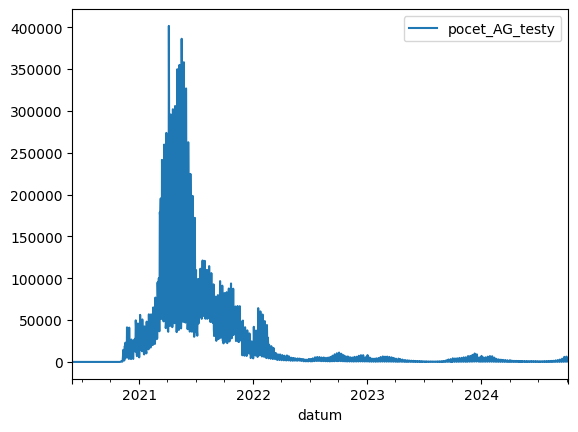

In [106]:
covid = pd.read_csv(r"https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19/testy-pcr-antigenni.csv",
            index_col='datum',
            parse_dates=True,
            usecols=[0,1,3])
covid.plot()

Ja je vidět, index jsou řetězce a to nám nijak nepomůže, když budeme chtít načíst určitého data z jednoho měsíce.
K tomu slouží další dva attribute:
- `parse_dates`: říká jestli případně co se bude parsovat
- `date_parser`: definuje funkci, která sepoužije, když není nastaveno použije se [pandas.to_datetime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime)

<Axes: xlabel='datum'>

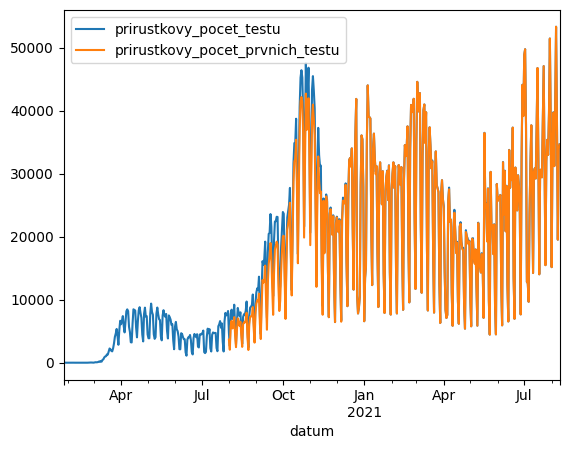

In [105]:
covid = pd.read_csv(r"https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19/testy.csv",
            index_col='datum',
            usecols=[0,1,3],
            parse_dates=True)
covid.plot()


V následujícím příkladu si vyčtu data je z prosince 2020

Nebo data jen z pondělků:

<Axes: xlabel='datum'>

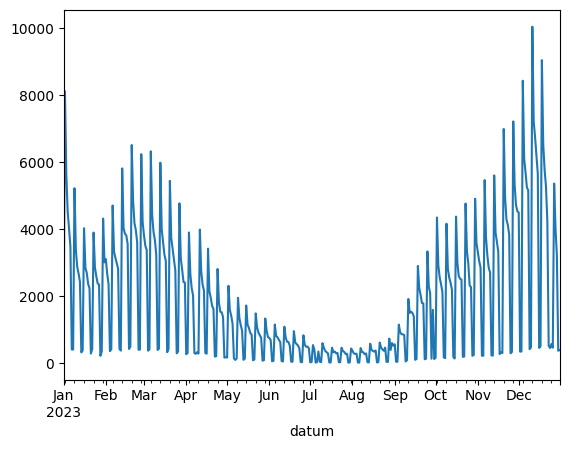

In [142]:
covid[covid.index.year == 2023]['pocet_AG_testy'].plot()

#### Načtení z SQL

Nebo z databáze pomocí sql dotazu.

V příkladu použíji databázi [sqlite3](https://www.sqlite.org/index.html), která má tu výhodu, že je součástí přímo Pythonu a tudíž se nemusí instalovat.
K otevření spojení stačí cesta k souboru, ve kterém je databáze uložena: [meetings.db](static/meetings.db).

In [115]:
import sqlite3

conn = sqlite3.connect("static/meetings.db")

Po navázání spojení, můžeme klást sql dotazy, které Pandas rovnou načítá jako DataFrames.
Naše databáze má následující schéma:

![](media/schema.svg)

A pokud budeme chtít načíst například celou tabulku `person` provedem to následovně:

In [116]:
with open('persons.sql', mode='r') as f:
    for line in f:
        if not line.startswith('--'):
            sql = line.strip()
            break
sql

'SELECT * from person_meeting'

In [117]:
person = pd.read_sql("""select p.id_person, p.nickname, l.city
                        from person as p 
                        join location as l 
                        on p.id_location=l.id_location""", conn, index_col="id_person")
person

nickname                    city
id_person                                      
22               axeMan                   Plzeň
21                 Sony          Hradec Králové
23         Clock-Master              Portishead
27             Emiii4x4                  Bolton
32             Leclaire               Lanškroun
33                 Gene               Lanškroun
41                zachy  Llanbedr Dyffryn Clwyd
40              LouReed              Prachatice
16                Fucha                   Plzeň
39               Swordy              Maastricht
17                 Oshi                  Znojmo
38                  8al                  Bremen
5                Teague                  Vsetín
4                Bertie         Bridge of Allan
3              Tungsten                Stirling
9               BigBill                    Linz
10                Usher                  Holice
15             TommyGun     Samopše - Mrchojedy
14                Lungs    Nowa Wieś Wrocławska
24                Petal              Portishead
25               Know$y               Sharpness
29               hilary          Hradec Králové
30              Igneess          Hradec Králové
28              Summers                  Bolton
31                 hali    Llanfairpwllgwyngyll
34                Kiiny                   Luton
1                  Ethy                  Bremen
2                 Gumby    Castletown-Bearhaven
37                cutty               Pardubice
36                pPhil               Pardubice
35                  fox               Pardubice
7                  mara                    Linz
6             Kaneshiro             Muir of Ord
8                Toledo                  Bremen
11                Alice               Inverness
13              january  Budišov nad Budišovkou
12               Julerd                  Holice
42               Tanaka               Antwerpen
20               Bessie          Hradec Králové
19               Arlene               Meziměstí
18             Magnolia                Bad Zell
43                 homa  Albrechtice nad Orlicí

In [118]:
person.to_pickle('person.pkl')

> #### Příklad:
> Načtěte data se statistikami získaných medailí v olympijských hrách
> Význam sloupců je:
>
> - **index**: název státu
> - **# Summer**: kolik letních her se stát zúčastnil
> - **Gold.S**, **Silver.S**, **Bronze.S**: Počty medailí v letních hrách
> - **# Winter**: kolika zimních her se stát zúčastnil
> - **Gold.W**, **Silver.W**, **Bronze.W****, Počty medailí v zimních hrách
> - **ID**: identifikátor státu

In [127]:
# Řešení
pd.read_excel('static/olympics.xlsx', index_col=0) #.loc['Czech Republic']

# Summer  Gold.S  Silver.S  Bronze.S  \
Afghanistan                             13       0         0         2   
Algeria                                 12       5         2         8   
Argentina                               23      18        24        28   
Armenia                                  5       1         2         9   
Australasia                              2       3         4         5   
...                                    ...     ...       ...       ...   
Yugoslavia                              16      26        29        28   
Independent Olympic Participants         1       0         1         2   
Zambia                                  12       0         1         1   
Zimbabwe                                12       3         4         1   
Mixed team                               3       8         5         4   

                                  # Winter  Gold.W  Silver.W  Bronze.W   ID  
Afghanistan                              0       0         0         0  AFG  
Algeria                                  3       0         0         0  ALG  
Argentina                               18       0         0         0  ARG  
Armenia                                  6       0         0         0  ARM  
Australasia                              0       0         0         0  ANZ  
...                                    ...     ...       ...       ...  ...  
Yugoslavia                              14       0         3         1  YUG  
Independent Olympic Participants         0       0         0         0  IOP  
Zambia                                   0       0         0         0  ZAM  
Zimbabwe                                 1       0         0         0  ZIM  
Mixed team                               0       0         0         0  ZZX  

[146 rows x 9 columns]

#### Poznámka k výkonu
Obecně platí, že jakákoliv databáze je mnohem výkonnější než kód v Pythonu.
Proto je vždycky vhodné do paměti načítat pouze minimální množství dat a pokud je možné provést nějaké agregační funkce v rámci dotazu, bude to vždy rychlejší, než je provádět v Pandas.


Další informace o načítání [Dokumentace IO](https://pandas.pydata.org/pandas-docs/stable/reference/io.html).

## Zjišťování základních informací

In [128]:
got = pd.read_csv('static/game_of_throne.csv', index_col=None)

V Jupyter Notebook se tabulka vykreslí „graficky”.
V konzoli se vypíše textově, ale data v ní jsou stejná:

In [130]:
got

actor                    role  episodes     died
0           Peter Dinklage        Tyrion Lannister        67      NaN
1            Emilia Clarke      Daenerys Targaryen        62      NaN
2              Lena Headey        Cersei Lannister        62      NaN
3            Kit Harington                Jon Sníh        61      NaN
4          Maisie Williams              Arya Stark        59      NaN
5            Sophie Turner             Sansa Stark        59      NaN
6    Nikolaj Coster Waldau         Jaime Lannister        56      NaN
7                Iain Glen           Jorah Mormont        52   S8, E3
8             John Bradley           Samwell Tarly        48      NaN
9              Alfie Allen           Theon Greyjoy        47   S8, E3
10            Conleth Hill              Lord Varys        45      NaN
11         Liam Cunningham            Davos Mořský        42      NaN
12     Gwendoline Christie        Brienne z Tarthu        41      NaN
13            Aidan Gillen  Petyr 'Malíček' Baeliš        40   S7, E7
14  Isaac Hempstead Wright           Brandon Stark        39      NaN
15             Rory McCann   Sandor 'Ohař' Clegane        38   S8, E5
16         Kristofer Hivju      Tormund Obrozhouba        34      NaN
17       Carice van Houten              Melisandra        29      NaN
18           Charles Dance         Tywin Lannister        27  S4, E10
19            Jack Gleeson       Joffrey Baratheon        26   S4, E2
20          Natalie Dormer         Margaery Tyrell        26  S6, E10
21        Michelle Fairley           Catelyn Stark        25   S3, E9
22         Stephen Dillane       Stannis Baratheon        24  S5, E10
23          Richard Madden              Robb Stark        21   S3, E9
24              Iwan Rheon           Ramsay Bolton        20   S6, E9
25    Dean-Charles Chapman        Tommen Baratheon        16  S6, E10
26          Jonathan Pryce        Nejvyšší vrabčák        12  S6, E10
27               Sean Bean      Eddard 'Ned' Stark         9   S1, E9
28               Mark Addy        Robert Baratheon         7   S1, E7

Základní informace o tabulce se dají získat metodou `info`:

In [131]:
got.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   actor     29 non-null     object
 1   role      29 non-null     object
 2   episodes  29 non-null     int64 
 3   died      15 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.0+ KB


Vidíme, že je to tabulka (`DataFrame`), má 6 řádků indexovaných (pomocí automaticky vygenerovaného indexu) od 0 do 5 a 3 sloupce: jeden s objekty, jeden s `int64` a jeden s `bool`.

Tyto datové typy (`dtypes`) se doplnily automaticky podle zadaných hodnot. Pandas je používán hlavně pro šetření pamětí: pythonní objekt typu `bool` zabírá v paměti desítky bytů, ale v `bool` sloupci si každá hodnota vystačí s jedním bytem.